# Pendulum with free point of support

[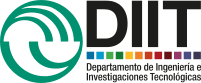](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Pendulum with free support, again

We reproduce the same problem, but this time we engage in a broader discussion about how many coordinates are required to describe this system, before solving it.

## Problem

> Bibliography:
>- Section 5 ($\S 5$) Exercise 2  
Mechanics  
Lev Davidovich Landau and E. M. Lifshitz  
Institute of physical problems, USSR Academy of Sciences, 1976

A particle with mass $m_2$ is hanging from a rigid bar of length $\ell$ and negligible mass. On the other end there is a device with mass $m_1$ linked to a horizontal bar, and it's free to move horizontally along the $x$ axis. The device allows the hanging bar to span any angle $\varphi$ respect to the vertical axis. 

1. Write expressions for kinetic energy, $T$ and potential, $V$, as functions of the generalized coordinates suggested by the figure.
1. Verify that if you fix the position of mass $m_1$ you recover the expressions of $T$ and $V$ of an ideal pendulum.

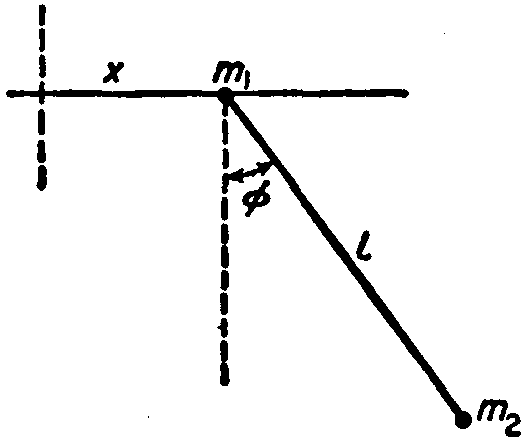

## Generalized coordinates
> Reference:  
> Section 1 ($\S 1$) "Generalized coordinates"  
Mechanics    
Lev Davidovich Landau and E. M. Lifshitz    
Institute of physical problems, USSR Academy of Sciences, 1976

### Generalized coordinates for this system
This system of $P=2$ particles, with masses $m_1$ and $m_2$, should have its 3 **degrees of freedom** in a 3D world.
The description of the dynamics oof this system would require $3P= 6$ coordinates for the positions and also $3P$ velocities.

But we are imposing **restrictions that remove degrees of freedom** to this particles:
1. Movement is restricted to a plane $\rightarrow$ two restrictions.
2. Particle $1$ is linked to a horizontal bar $\rightarrow$ one restriction.
3. Particle $2$ is always at distance $\ell$ from $1$ $\rightarrow$ another restriction.

A total of $K=4$ restrictions, that reduce the number of degrees of freedom to $3P-K= 2$.
That means we only need $2$ generalized coordinates (and their corresponding derivatives respect to time) to describe the dynamics of this system.

The expression $$\boxed{3P-K}$$ allows us to obtain the number of generalized coordinates that are required to model a system.  

### Notation
To describe the $N$ degrees of freedom we will use $q_1, q_2,\dots,q_N$ **generalized coordinates**.
- They are not necessarily the coordinates in a system, e.g. $(\rho,\varphi, \theta)$ in the spherical.
- They can be any magnitude that allows us to determine positions, e.g. a coordinate in the Cartesian system can be a function of these $x_1= f(q_1, q_2,\dots,q_N)$.

We know that to describe the dynamics of a system, the positions are not enough and we also need the velocities.

So we'll also be interested in the **generalized velocities**: $\dot{q}_1, \dot{q}_2,\dots,\dot{q}_N$.

## Solution

We copy all the steps below, even those already written before, so that you can "copy and paste" the following for the resolution of any exercise.

In [4]:
import sympy as sym # import functions for symbolic manipulations
from sympy.physics import mechanics as mech # from sympy we use functions for mechanics
mech.init_vprinting() # dot notation for velocity and acceleration

In [5]:
# frame of reference
e = mech.ReferenceFrame('e') # Cartesian frame of reference

In [6]:
# Parameters for this system
g, m1, m2, l = sym.symbols('g, m_1, m_2, \ell', positive=True)

### Positions

In [7]:
# position of particle 1
x = mech.dynamicsymbols('x') # x changes with time, thus it is a dynamic variable
m1_r = x* e.x # position of particle of mass m1
m1_r

In [8]:
# position of second particle
phi = mech.dynamicsymbols('phi')
m2_r = m1_r + l*( sym.sin(phi)* e.x + sym.cos(phi)* (-e.y) )  # y unit vector points upward
m2_r

### Translational kinetic energy

In [9]:
def translationalKineticEnergy(mass, position, frameOfReference):
    """
    From mass and position of a point particle in a frame of reference, it returns its kinetic energy.
    
    Parameters
    ----------
    mass: (sympy.core.symbol.Symbol)
        of a particle
    position: (sympy.physics.vector.vector.Vector)
        of particle's center of mass
    frameOfReference: (sympy.physics.vector.frame.ReferenceFrame)
        in which position is expressed
    
    Returns
    -------
    Equality Sympy (sympy.core.relational.Equality)
        On the right hand side, it explains the kinetic energy of the system as a function of generalized coordinates, velocities and time.
        Kinetic Energy, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocity = position.dt(frameOfReference)
    oneHalf = sym.Rational(1,2)
    T_translational = sym.Eq(
        sym.Symbol('T_{translational}'),
        oneHalf* mass* velocity.dot(velocity)
        ).simplify()
    return T_translational

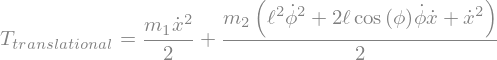

In [10]:
# Kinetic energy of the system
m1_T = translationalKineticEnergy(m1, m1_r, e)
m2_T = translationalKineticEnergy(m2, m2_r, e)
T = sym.Eq(m1_T.lhs, m1_T.rhs + m2_T.rhs ) 
T

------------------------------------------------

## Gravitational force
There are four forces in physics: 
- gravitational 
- weak nuclear 
- electromagnetic 
- strong nuclear

that for enormous levels of energy (e.g. particle accelerators, cosmological phenomena) are unified: first the electro-weak, then with more energy the strong force is added.
It is expected that the gravitational force can be unified into new theories, making all the forces in the universe actually one only force.

But in our daily lives, interactions are at low energy and **almost all of them are electromagnetic**.
When we push an object composed of molecules and/or atoms into a crystal lattice, the electrons in the molecules in our hand repel those in the object.
Such is the repulsion that prevents molecules from the hand from binding inside the object and that we merge with it.
Adhesives are the exception because they are made with molecules of strong electrical polarity. 

We say that **almost all** everyday interactions are electromagnetic because the **gravitational force** is the big exception.
Beyond the nonsense created by astrologers, the planets do not exert a considerable interaction upon us, since the gravitational force decreases with the square of the distance.
There is one planet that is the exception, ours.
The gravitational force exerted upon us by our planet is so strong that we name it: **weight**.

### What is weight?
It is the name we give to the **gravitational force** exerted upon objects with mass $m$ at a height not too far from the Earth's surface.

What is that about height?
Nobody thinks about the weight of the Moon or Mars.
Earth exerts some gravitational pull upon them, but the distance diminishes the effect.
Mars is not affected by Earth, but the Moon is.

If the height isn't above a few hundred kilometers, the Earth's gravitational field exerts a force upon any object of mass $m$ such that its acceleration $\vec{g}$, the force we call weight:
$$
    \vec{W} = m \vec{g}.
$$

A couple of things we have to consider about this force:
- To move $m$ against the direction of $\vec{g}$
    - this requires doing work upon this object, meaning external work is positive, 
    - and it gains potential energy.
- On the other hand, if we let it fall
    - this work is returned to us, meaning external work is negative,
    - and it loses potential energy.

And this holds always **no matter how we chose the orientation of the axes in our coordinate system**.

### Conservative forces and potential energy
The relation between a conservative force and potential that describes the field that generates this force is
$$
\vec{F}= - \vec{\nabla} V.
$$

We will work in a **cartesian coordinate system**, so a position is
$$
\vec{r} = (x,y,z) = x \hat{x} + y \hat{y} + z \hat{z}.
$$

To determine a force, we must use the operator $\vec{\nabla}$ in this coordinate system.
This vector operator is applied to the potential $V = V(x,y,z)$ which is a scalar function
$$
\vec{F} 
= - \vec{\nabla}V 
= - \left( \frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z} \right) V 
= - \left( \frac{\partial V}{\partial x} \hat{x} + \frac{\partial V }{\partial y} \hat{y} + \frac{\partial V}{\partial z} \hat{z} \right) .
$$

### Axes orientation
We will orient the axes in a way such that the horizontal directions $\hat{x}$ y $\hat{y}$ are parallel to a _ground_, and $\hat{z}$ is vertical.

#### $\hat{z}$ axis directed upward
Since acceleration due to gravity is directed downward
$$
\vec{g} = g (-\hat{z}),
$$
the expression for weight is
$$
\vec{W} = m (-g \hat{z}).
$$

Gravitational potential energy is calculated using that expression
$$
\vec{W} = m (-g \hat{z}) = - \vec{\nabla} V = - \frac{\mathrm{d} V}{\mathrm{d} z} \hat{z},
$$
where only the component in the $\hat{z}$ axis is left when calculating the gradient of the potential, because the force has no other components.
In order to obtain $V$ we must integrate
$$
\begin{aligned}
m g (- \hat{z}) &= - \frac{\mathrm{d} V}{\mathrm{d} z} \hat{z}\\
m g (- \hat{z}) \mathrm{d} z &= - \mathrm{d} V \hat{z}\\
m (g \hat{z}) \int \mathrm{d} z &= \int \mathrm{d} V \hat{z} \\
m g z \biggr\rvert_{z_0}^z &= V \biggr\rvert_{z_0}^z\\
m g (z - z_0) &= V(z) - V(z_0).
\end{aligned}
$$

The potential $V(z) = m g (z - z_0) + V(z_0)$ is defined after we set a reference value $V(z_0)$, calculated at a reference level $z_0$.
If $z_0 = 0$ y $V(z_0) = 0$, seting the reference potential at the origin (i.e. the  _ground potential_) we get
$$
V(z) = m g z.
$$
That is, if the object **moves upward**, $z$ increases, and the **the potential increases**.

#### $\hat{z}$ directed downward
In this case
$$
\vec{g} = g ( \hat{z}),
$$
then
$$
\begin{aligned}
m g \hat{z} &= - \frac{\mathrm{d} V}{\mathrm{d} z} \hat{z}\\
m g \hat{z} \mathrm{d} z&= - \mathrm{d} V \hat{z}\\
m g \hat{z}\int \mathrm{d} z &= - \int \mathrm{d} V \hat{z}\\
m g z \biggr\rvert_{z_0}^z &= - V \biggr\rvert_{z_0}^z \\
m g (z - z_0) &= - V(z) + V(z_0).
\end{aligned}
$$

If we set $z_0 = 0$ y $V(z_0) = 0$ again, we get 
$$
V(z) = -m g z,
$$
and here too **if the object moves upward**, and that means $z$ decreases, the **potential increases**.

## A general formulation

Potential energy is the negative of the gradient.
Then for gravitational potential energy it is the negative of weight force times height.
So
$$
\boxed{
V = - (m \vec{g}) \cdot \vec{r} = - \vec{W} \cdot \vec{r}
},
$$
where the height in the corresponding projection in the selected frame of reference affects the position vector $\vec{r}$.

Let's test this.
If we set the $\hat{z}$ axis pointing upward
$$
\begin{aligned}
V &= - \vec{W} \cdot \vec{r}\\
V &= - (m (-g \hat{z}) ) \cdot (x \hat{x} + y \hat{y} + z \hat{z}) = - (m g (-\hat{z}) ) \cdot (z \hat{z})\\
V &= m g z \hat{z} \cdot \hat{z} = m g z,
\end{aligned}
$$
and since $\hat{z} \cdot \hat{z} = 1$, we find the same expression that was obtained by integration.

With $\hat{z}$ pointing downward
$$
\begin{aligned}
V &= - \vec{W} \cdot \vec{r}\\
V &= - (m (g \hat{z} ) ) \cdot (z \hat{z}) = - m g z,
\end{aligned}
$$
we get the same expression we found for this case.

---------------------------------

## Back to the problem

Only particle with 'm_2' moves in a direction where its gravitational potential changes.
Therefore, the gravitational potential energy for the system in this problem can be calculated according to the following.
$$
\begin{aligned}
V(\varphi)
&= -\vec{W}_2 \cdot \vec{r}_2 \\
&= - [m_2 (g (- \hat{y} ) ] \cdot (x_2 \hat{x} + y_2 \hat{y}) \\
&= - (- m_2 g\hat{y} ) \cdot ( y_2 \hat{y}) \\
&= (m_2 g) \hat{y} \cdot (-\ell \cos{(\varphi)} ) \hat{y} \\
&= - \ell g m_2 \cos{(\varphi)}.
\end{aligned}
$$

In [11]:
m2_r

In [12]:
# Potential energy
m1_V = 0
W_2 = m2* g* (- e.y) # weight
m2_V = -W_2.dot(m2_r) # -W dot product position
V = sym.Eq(sym.Symbol('V'), (m1_V + m2_V ) )
V

It is tempting to create a function that calculates the gravitational potential energy of each particle in the system from
$$
V_\mathrm{gravitational} = - \vec{W} \cdot \vec{r} = - (m \vec{g}) \cdot \vec{r}
$$

In [ ]:
def gravitationalPotentialEnergy(mass, position, accelerationDueToGravity):
    """
    It returns the gravitational potential energy of a particle of mass m whose position r is given in a frame of reference in which g is the Earth's gravitational acceleration.
    
    Parameters
    ----------
    accelerationDueToGravity: (sympy.physics.vector.vector.Vector)
        vector oriented according to the frame of reference
    mass: (sympy.core.symbol.Symbol
        of the particle
    position: (sympy.core.symbol.Symbol)
        of the center of mass in a frame of reference related to accelerationDueToGravity
    
    Returns
    -------
    Equality Sympy (sympy.core.relational.Equality)
        On the right hand side, it explains the potential energy of the system as a function of generalized coordinates and time.
    generalizedCoordinate: (sympy.core.symbol.Symbol)
        V = - (m \vec{accelerationDueToGravity}) \cdot{position}
    """
    V_gravitational = sym.Eq(
        sym.Symbol('V_{gravitational}'),
        - (mass* accelerationDueToGravity).dot(position)
        ).simplify()
    return V_gravitational

In [14]:
# Potential energy
g_vector = g* (-e.y) # acceleration due to gravity in -y axis
m1_V = gravitationalPotentialEnergy(m1, m1_r, g_vector)
m2_V = gravitationalPotentialEnergy(m2, m2_r, g_vector)
V = sym.Eq(m1_V.lhs, m1_V.rhs + m2_V.rhs ).simplify()
V

Showing that we obtain the same result than calculating it "by hand", and that the particle with position 'm1_r' should not be considered as a particular case.

---------------------------------

## Ideal pendulum

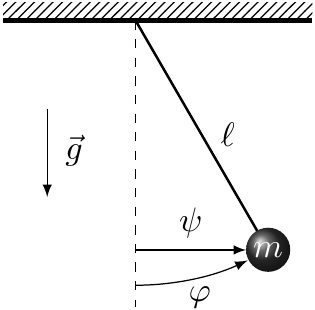

### Kinetic energy

Since length $\ell$ is constant, it is convenient to work in cylindrical coordinates.
In these, a rigid and ideal pendulum has a single non-zero component of its velocity: the one in $\hat{\varphi}$, that is $\dot{\vec{r}} \cdot \hat{\varphi}= \ell \dot{\varphi}$.
Then
$$
T= \frac{m}{2} \dot{\vec{r}}^2= \frac{m}{2} \ell^2 \dot{\varphi}^2.
$$


In the expression of the kinetic energy of the previous system, the generalized coordinate of $m_1$, which is $x$, the position of the support point is not present.

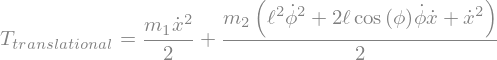

In [15]:
T

But the generalized velocity $\dot{x}$ that corresponds to that coordinate is present.

Pero si figura la velocidad generalizada $\dot{x}$ que corresponde a esa coordenada.
If the support point is fixed, obviously $\dot{x}$ should be $0$.

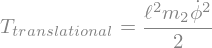

In [16]:
fixedSupport_T = T.subs(x.diff(t), 0) # subs: substitution
fixedSupport_T

In this expression we can find a common factor $\ell^2 \dot{\varphi}^2$ by leaving the sum of the square of the sine and that of the cosine in parentheses. This, as we know, is simplified to $1.

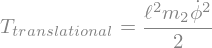

In [17]:
fixedSupport_T.simplify()

This is the same expression of $T$ than for the ideal pendulum.

### Potential energy

Gravitational potential energy is $V(y)= m g y$.
We set that for $y=0$ is null, that is $V(y=0)= 0$.
Then in cylindrical coordinates $y= -\ell \cos{\varphi}$ we get
$$
V(\varphi)= -m g \ell \cos{\varphi}.
$$

Since neither $x_1$ nor $\dot{x}_1$ have any role in potential energy, it is identical to that of the ideal pendulum.

In [18]:
V